In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from ydata_profiling import ProfileReport

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# profile_report = ProfileReport(train_data, title='spaceship titanic profile report')
# profile_report.to_file('profile_report.html')


C:\Users\yotam\AppData\Local\Temp\ipykernel_20084\3654866236.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
X_train = train_data.drop(columns='Transported', axis=1)
y_train = train_data.Transported
X_test = test_data.copy()
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [3]:
print(train_data.shape)
print(test_data.shape)

(8693, 14)
(4277, 13)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print('TRAIN MISSING VALUES')
cols_with_missing_vals = [col for col in X_train.columns if X_train[col].isna().any()]
print(cols_with_missing_vals)
print(X_train.isna().sum().sort_values(ascending=False),'\n')
print('TEST MISSING VALUES')
cols_with_missing_vals = [col for col in X_test.columns if X_test[col].isna().any()]
print(cols_with_missing_vals)
print(X_test.isna().sum().sort_values(ascending=False),'\n')


TRAIN MISSING VALUES
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
dtype: int64 

TEST MISSING VALUES
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64 


In [6]:
print('categorical features cardinality')
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])



categorical features cardinality


[('CryoSleep', 2),
 ('VIP', 2),
 ('HomePlanet', 3),
 ('Destination', 3),
 ('Cabin', 6560),
 ('Name', 8473),
 ('PassengerId', 8693)]

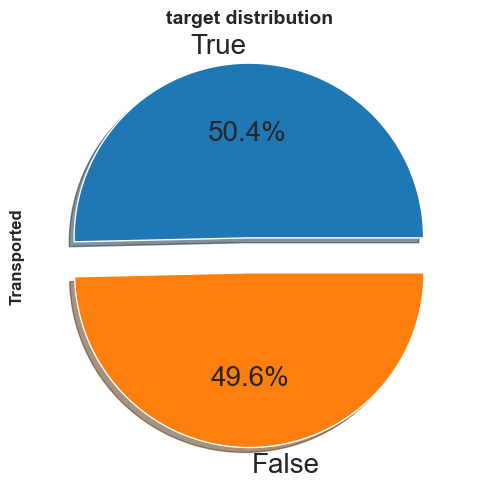

In [7]:
plt.figure(figsize=(5,5))
y_train.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':20})
plt.title('target distribution')
plt.show()

In [8]:

def plot_numeric(df, feature, target=None):
    # Create a 1x3 grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    # First subplot (histogram + kde)
    sns.histplot(df[feature], kde=True, kde_kws=dict(cut=4), ax=axes[0])
    axes[0].set_title("{} hist & kde distribution".format(feature))
    axes[0].set_xlabel("{}".format(feature))
    axes[0].set_ylabel('count')

    # Second subplot (box plot)
    df[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title("{} box plot".format(feature))


    # sometimes this graph is not very informative, works best for a low distribution value with low skew
    if target is not None:
        sns.histplot(data=df, x=feature, hue=target, ax=axes[2])
        axes[2].set_title("{} hist & kde distribution".format(feature))
        axes[2].set_xlabel("{}".format(feature))
        axes[2].set_ylabel('count')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

def analyse_high_cardinality (df, feat):
    print('-------------Analysis of {} ----------\n'.format(feat))
    print('General Description of {}\n'.format(feat), df[feat].dropna().describe(), '\n')
    print('Number of Duplicates in {}\n'.format(feat), df[feat].duplicated().sum(), '\n')
    print('Value Counts in {}\n'.format(feat), df[feat].value_counts(), '\n')

def analyse_low_cardinality(df, feat, target=None):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    df[feat].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title("{} Value Counts (Bar)".format(feat))
    axes[0].set_xlabel("{}".format(feat))
    axes[0].set_ylabel("Count")

    df[feat].value_counts().plot(kind='pie', autopct='%0.1f%%', shadow=True, textprops={'fontsize':15}, ax=axes[1])
    axes[1].set_title("{} Value Counts (Pie)".format(feat))
    if target is not None:
        # Third subplot (bar)
        sns.countplot(data=df, x=feat, hue=target, ax=axes[2])
        axes[2].set_title("{} Value Counts with Hue (Bar)".format(feat))
        axes[2].set_xlabel("{}".format(feat))
        axes[2].set_ylabel("Count")


    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

    print('-------------Analysis of {} ----------\n'.format(feat))
    print('Value Counts in {}\n'.format(feat), df[feat].value_counts(), '\n')
    print('Number of missing values in {}:'.format(feat), df[feat].nunique(), '\n')

In [9]:
numeric_features = [col for col in X_train.columns if X_train[col].dtype == 'float64']
cat_features = [col for col in X_train.columns if X_train[col].dtype == 'object']
print('numeric features: ', numeric_features)
print('categorical features: ', cat_features)

numeric features:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical features:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [10]:
high_card = ['PassengerId','Cabin','Name']
low_card = ['HomePlanet', 'CryoSleep','Destination', 'VIP']

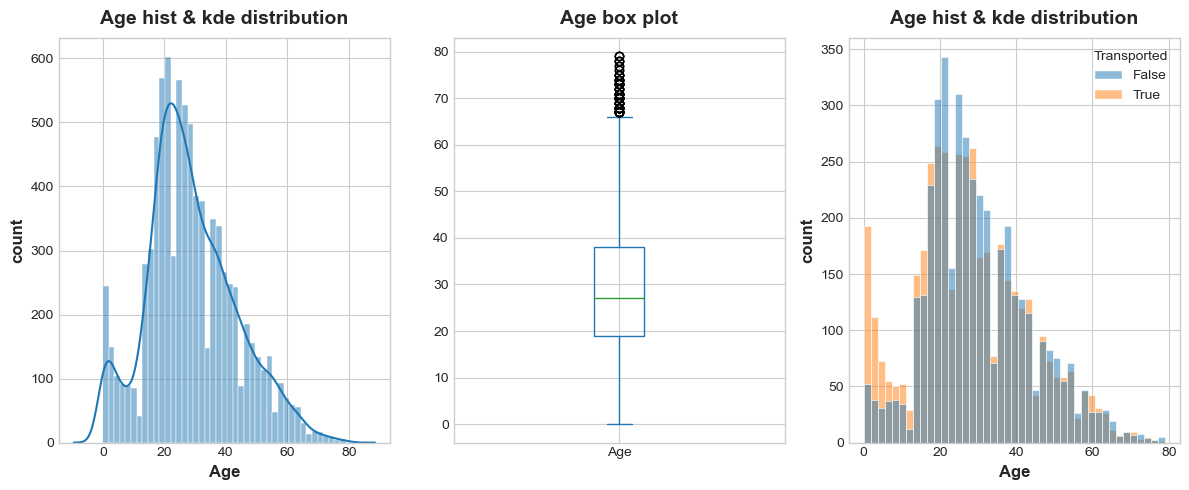

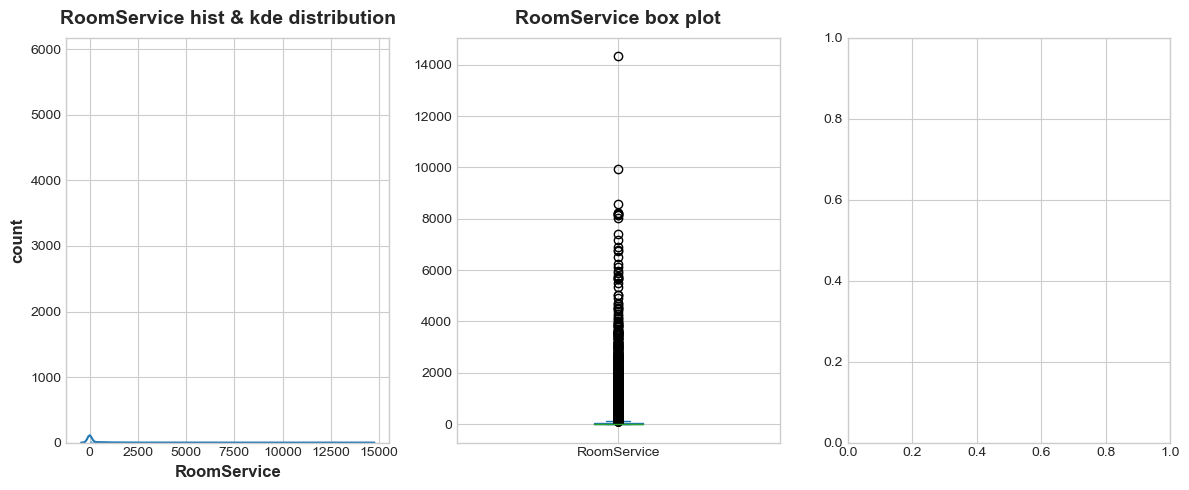

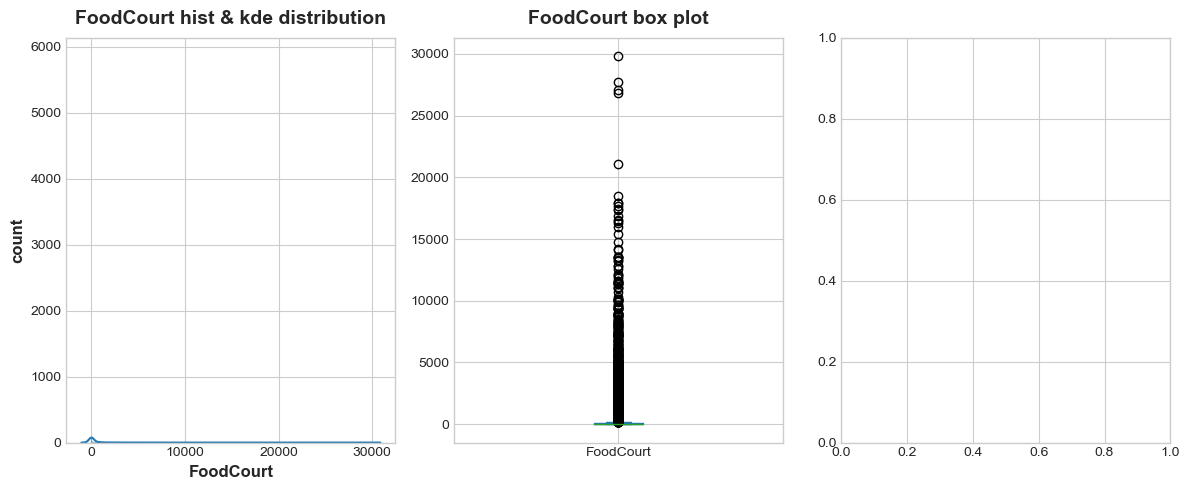

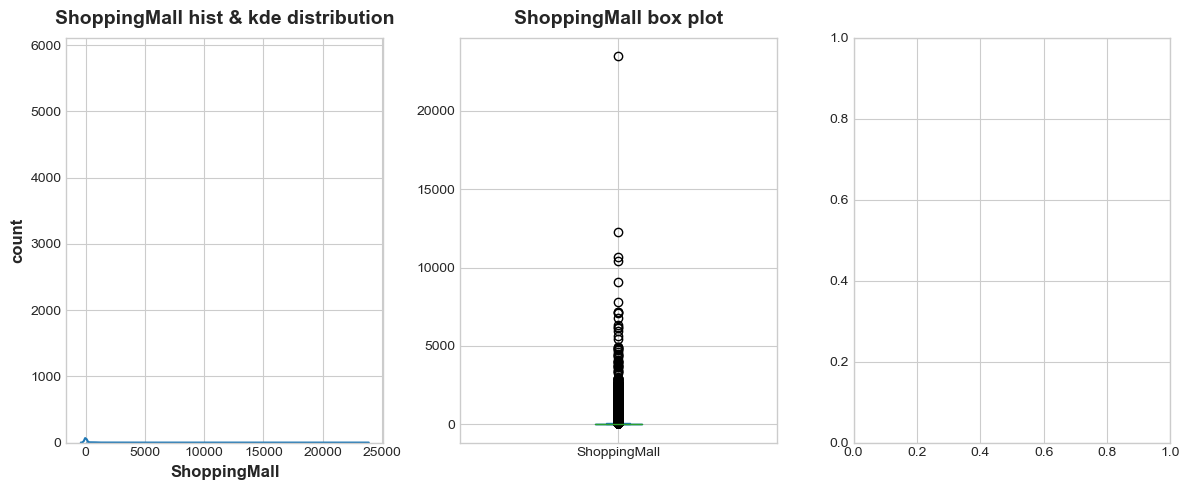

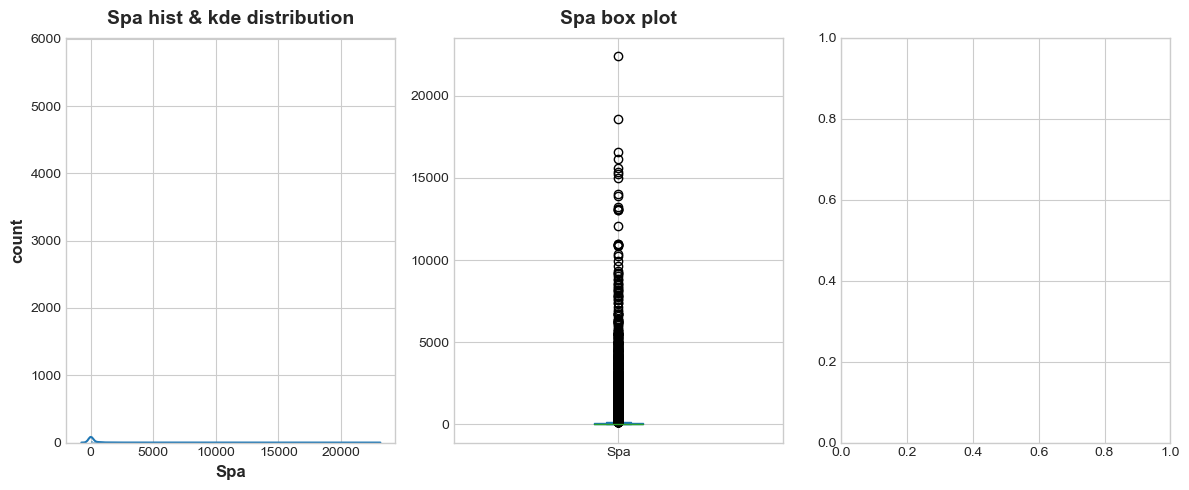

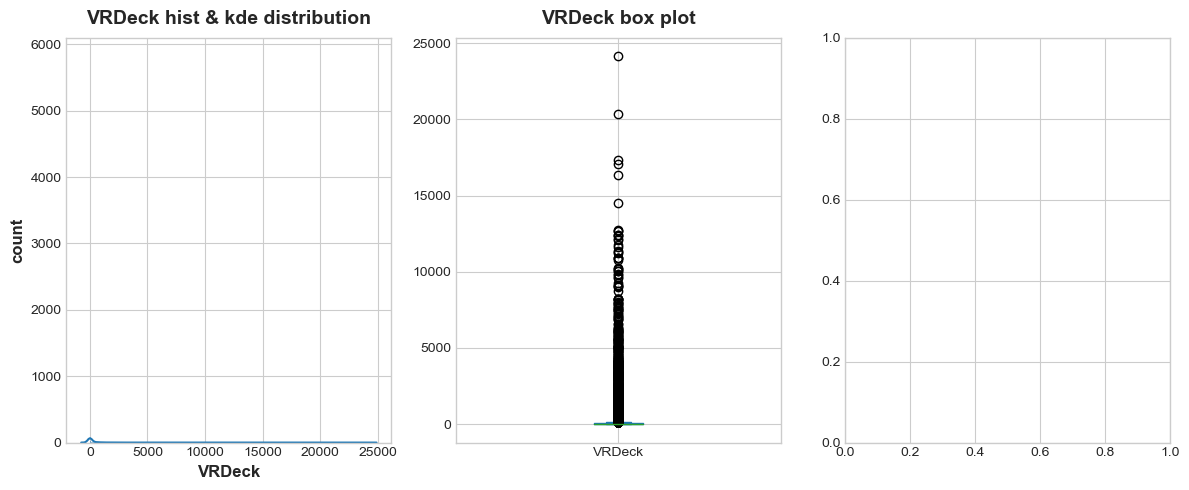

In [11]:
for feat in numeric_features:
    if feat == 'Age':
        plot_numeric(train_data, feat, 'Transported')
    else:
        plot_numeric(train_data, feat)

young age seems to be correlated to transported 
add log to the different categories
generalize age to bins
create expanse col to sum the amount spent

In [12]:
for feat in high_card:
    analyse_high_cardinality(X_train,feat)

-------------Analysis of PassengerId ----------

General Description of PassengerId
 count        8693
unique       8693
top       0001_01
freq            1
Name: PassengerId, dtype: object 

Number of Duplicates in PassengerId
 0 

Value Counts in PassengerId
 0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64 

-------------Analysis of Cabin ----------

General Description of Cabin
 count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object 

Number of Duplicates in Cabin
 2132 

Value Counts in Cabin
 G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64 

-------------Analysis of Name ----------

General Description of Name
 count               8493
unique              

split Id and cabin to the different elements 

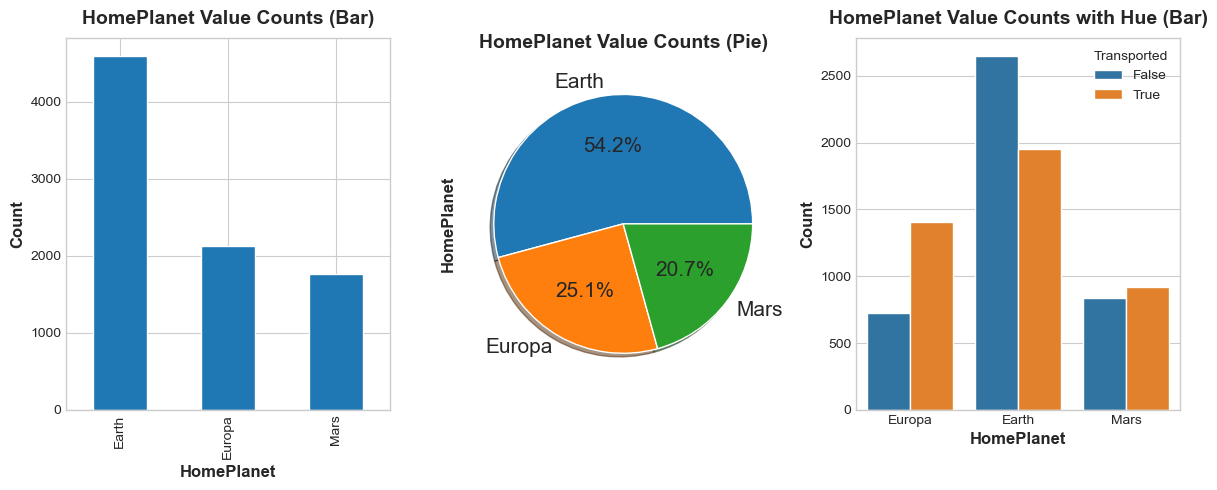

-------------Analysis of HomePlanet ----------

Value Counts in HomePlanet
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64 

Number of missing values in HomePlanet: 3 


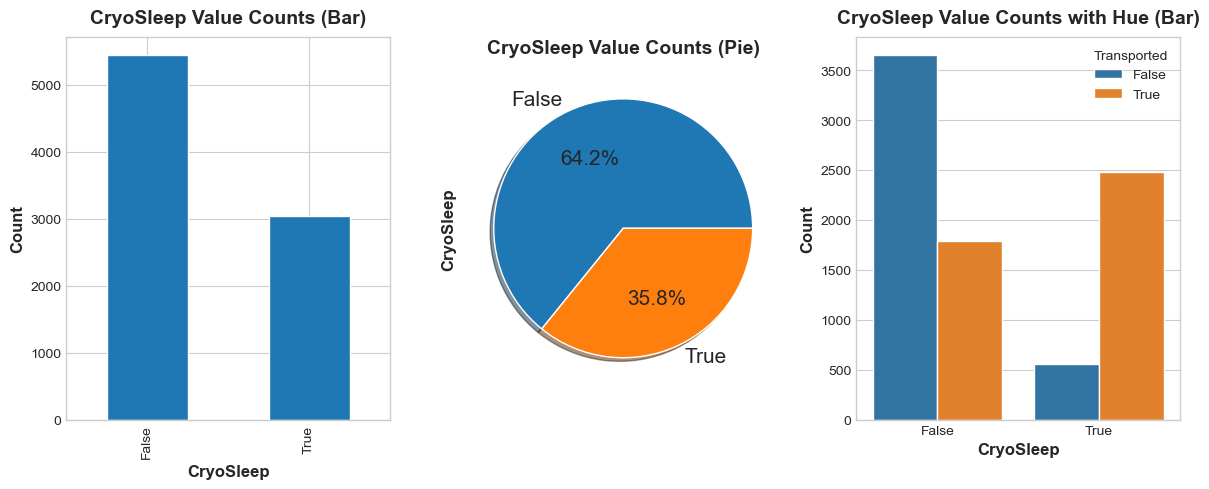

-------------Analysis of CryoSleep ----------

Value Counts in CryoSleep
 False    5439
True     3037
Name: CryoSleep, dtype: int64 

Number of missing values in CryoSleep: 2 


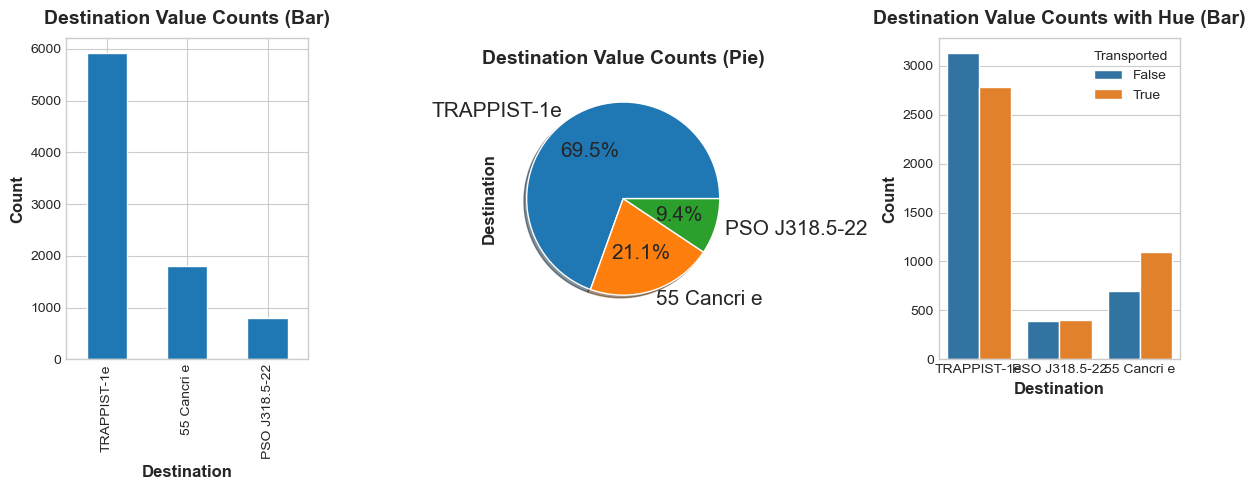

-------------Analysis of Destination ----------

Value Counts in Destination
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64 

Number of missing values in Destination: 3 


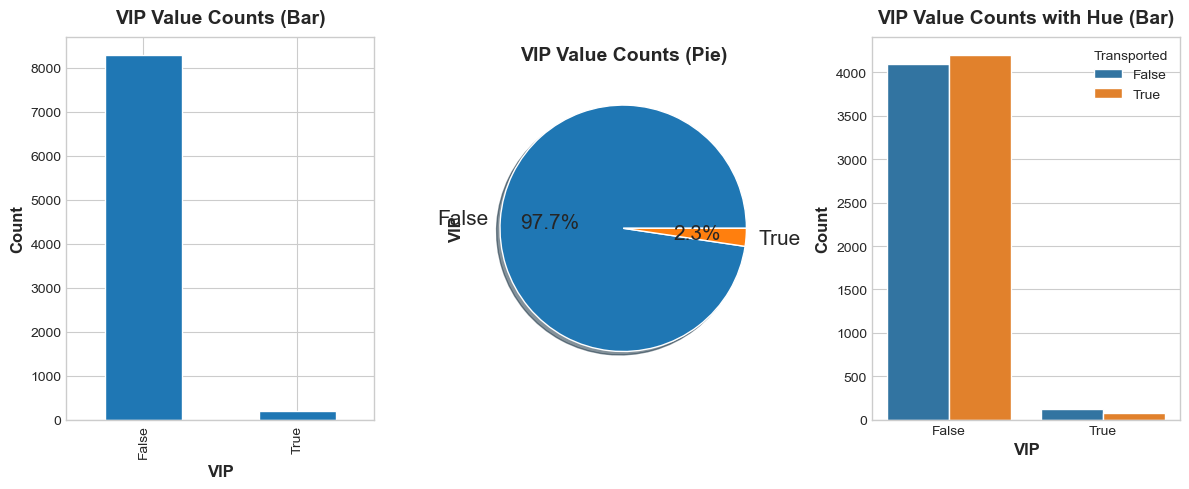

-------------Analysis of VIP ----------

Value Counts in VIP
 False    8291
True      199
Name: VIP, dtype: int64 

Number of missing values in VIP: 2 


In [13]:
for feat in low_card:
    analyse_low_cardinality(train_data,feat,'Transported')

cryo seems to have high correlation to transported - fill wisely
most people have false Vip

baseline model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X_baseline = X_train.copy()
y_baseline = y_train.copy()

all_data = pd.concat([X_baseline, y_baseline],axis=1).dropna(axis=0)
X_baseline= all_data.drop(columns=['PassengerId', 'Cabin', 'Name','Transported']) # need to process the high cardinality features first
y_baseline= all_data.Transported

X_baseline_train, X_baseline_test, y_baseline_train , y_baseline_test = train_test_split(X_baseline, y_baseline)

low_cardinality_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

low_card_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('low_card',low_card_transformer,low_cardinality_features),
    ('numeric', numeric_transformer, numeric_features)
])

baseline_pipeline= Pipeline(steps=[('preprocessor',preprocessor),
                             ('model',LogisticRegression())])

baseline_pipeline.fit(X_baseline_train, y_baseline_train)
y_pred = baseline_pipeline.predict(X_baseline_test)
print(accuracy_score(y_pred,y_baseline_test))

0.8069007263922519


# Feature Engineering

expenditure col

In [15]:
leisure_expenditures= ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X_train['TotalSpent'] = X_train[leisure_expenditures].sum(axis=1)
X_test['TotalSpent'] = X_test[leisure_expenditures].sum(axis=1)
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,4637.0


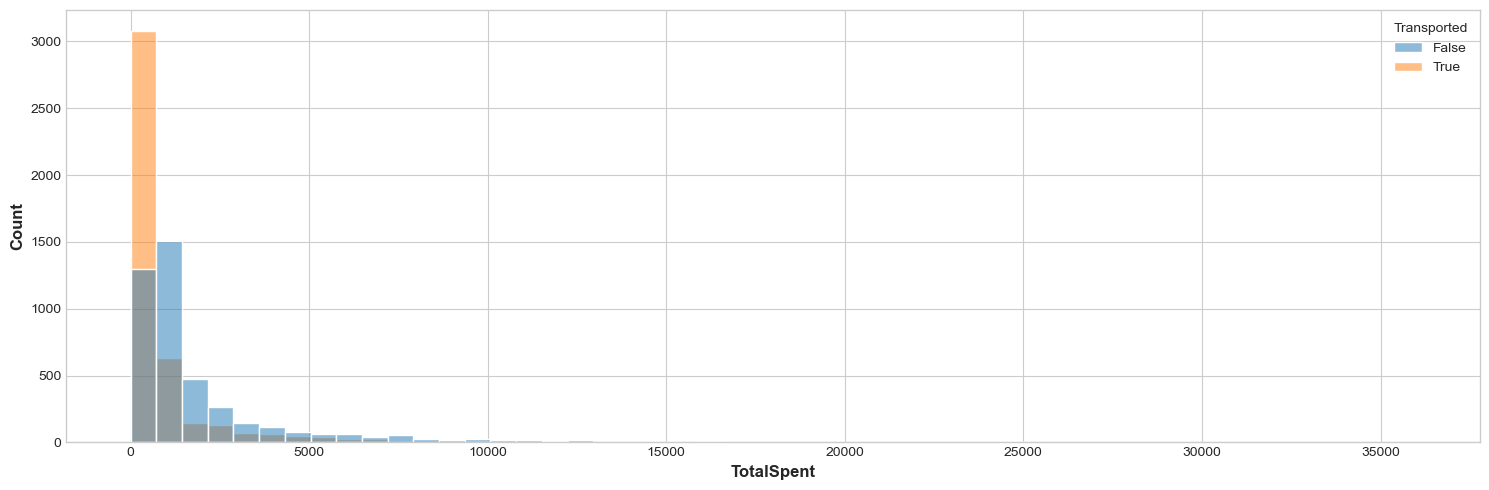

In [16]:
plt.figure(figsize=(15,5))
sns.histplot(data=pd.concat([X_train,y_train],axis=1), x='TotalSpent',hue='Transported',bins=50)
plt.show()

lots of values are at 0 lets add a binary column with spent or not spent

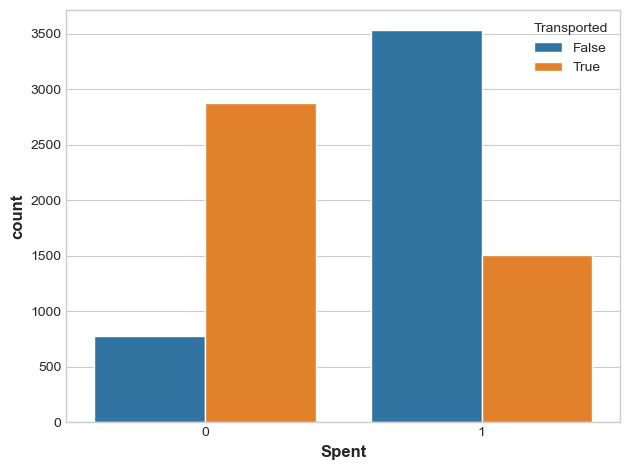

In [17]:
X_train['Spent'] = (X_train[leisure_expenditures] > 0).any(axis=1).astype(int)
X_test['Spent'] = (X_test[leisure_expenditures] > 0).any(axis=1).astype(int)
sns.countplot(data=pd.concat([X_train,y_train],axis=1), x='Spent',hue='Transported')
plt.show()

split Id and Cabin

In [18]:
X_train[['PassengerId','Cabin']]

,PassengerId,Cabin
0,0001_01,B/0/P
1,0002_01,F/0/S
2,0003_01,A/0/S
3,0003_02,A/0/S
4,0004_01,F/1/S
...,...,...
8688,9276_01,A/98/P
8689,9278_01,G/1499/S
8690,9279_01,G/1500/S
8691,9280_01,E/608/S


In [19]:
# fill missing values 
X_train.Cabin.fillna('ZZ/9999/ZZ', inplace=True)
X_test.Cabin.fillna('ZZ/9999/ZZ', inplace=True)
print(X_train['Cabin'].isna().sum())
print(X_test['Cabin'].isna().sum())

0
0


In [20]:
X_train['GroupNumber'] = X_train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
X_test['GroupNumber'] = X_test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpent,Spent,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,736.0,1,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,10383.0,1,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,5176.0,1,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1091.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,8536.0,1,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0.0,0,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1873.0,1,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,4637.0,1,9280


In [21]:
X_train.GroupNumber.describe()

count    8693.000000
mean     4633.389624
std      2671.028856
min         1.000000
25%      2319.000000
50%      4630.000000
75%      6883.000000
max      9280.000000
Name: GroupNumber, dtype: float64

In [22]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=X_train, x= 'GroupNumber',binwidth=1)
plt.subplot(1,2,2)
sns.histplot(data=pd.concat([X_train,y_train],axis=1), x='GroupNumber',hue='Transported',binwidth=1)
fig.tight_layout()
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000025BD57222A0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000025BD7F3D3A0> (for post_execute):



KeyboardInterrupt



seems to be not very informative, lets generilize to group size

In [ ]:
X_train['GroupSize'] = X_train.groupby('GroupNumber')['GroupNumber'].transform('count')
X_test['GroupSize'] = X_test.groupby('GroupNumber')['GroupNumber'].transform('count')
X_train

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data= pd.concat([X_train,y_train],axis=1),x='GroupSize', hue= 'Transported' )
plt.show()

we can see that only groups with one person have a lower chance to be transported, lets create an even more compressed feature called solo traveler

In [ ]:
X_train['SoloTraveler'] = (X_train['GroupSize'] == 1).astype(int)
X_test['SoloTraveler'] = (X_test['GroupSize'] == 1).astype(int)
X_train

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data= pd.concat([X_train,y_train],axis=1),x='SoloTraveler', hue= 'Transported' )
plt.show()

conclution is to remove PassengerId, and GroupNumber and to stay with the lower cardinality features

breakdown cabin into deck/num/side imported to remember that Nan values have been changed to ZZ/9999/ZZ

In [ ]:
X_train['Deck'] = X_train['Cabin'].map(lambda x: x.split('/')[0])
X_train['CabinNumber'] = X_train['Cabin'].map(lambda x: x.split('/')[1]).astype(int)
X_train['Side'] = X_train['Cabin'].map(lambda x: x.split('/')[2])

X_test['Deck'] = X_test['Cabin'].map(lambda x: x.split('/')[0])
X_test['CabinNumber'] = X_test['Cabin'].map(lambda x: x.split('/')[1]).astype(int)
X_test['Side'] = X_test['Cabin'].map(lambda x: x.split('/')[2])
X_train

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
sns.countplot(data=X_train, x= 'Deck')

plt.subplot(2,3,2)
sns.histplot(data=X_train, x= 'CabinNumber')
plt.xlim([0,2000])

plt.subplot(2,3,3)
sns.countplot(data=X_train, x= 'Side')

plt.subplot(2,3,4)
sns.countplot(data= pd.concat([X_train,y_train],axis=1),x='Deck', hue= 'Transported' )

plt.subplot(2,3,5)
sns.histplot(data= pd.concat([X_train,y_train],axis=1),x='CabinNumber', hue= 'Transported' )
plt.xlim([0,2000])

plt.subplot(2,3,6)
sns.countplot(data= pd.concat([X_train,y_train],axis=1),x='Side', hue= 'Transported' )

fig.tight_layout()


cabin number appears to be speprable into groups of intervals of about 300 lets create another feature grouping them into 7 groups 

In [ ]:
X_train.loc[X_train['Deck'] == 'ZZ', 'Deck'] = np.nan
X_train.loc[X_train['CabinNumber'] == '9999', 'CabinNumber'] = np.nan
X_train.loc[X_train['Side'] == 'ZZ', 'Side'] = np.nan

X_test.loc[X_test['Deck'] == 'ZZ', 'Deck'] = np.nan
X_test.loc[X_test['CabinNumber'] == '9999', 'CabinNumber'] = np.nan
X_test.loc[X_test['Side'] == 'ZZ', 'Side'] = np.nan

In [ ]:
X_train['CabinNumber_1'] = ((X_train['CabinNumber'] >= 0) & (X_train['CabinNumber'] <= 300)).astype(int)
X_train['CabinNumber_2'] = ((X_train['CabinNumber'] > 300) & (X_train['CabinNumber'] <= 600)).astype(int)
X_train['CabinNumber_3'] = ((X_train['CabinNumber'] > 600) & (X_train['CabinNumber'] <= 900)).astype(int)
X_train['CabinNumber_4'] = ((X_train['CabinNumber'] > 900) & (X_train['CabinNumber'] <= 1200)).astype(int)
X_train['CabinNumber_5'] = ((X_train['CabinNumber'] > 1200) & (X_train['CabinNumber'] <= 1500)).astype(int)
X_train['CabinNumber_6'] = ((X_train['CabinNumber'] > 1500) & (X_train['CabinNumber'] <= 1800)).astype(int)
X_train['CabinNumber_7'] = (X_train['CabinNumber'] > 1800).astype(int)


X_test['CabinNumber_1'] = ((X_test['CabinNumber'] >= 0) & (X_test['CabinNumber'] <= 300)).astype(int)
X_test['CabinNumber_2'] = ((X_test['CabinNumber'] > 300) & (X_test['CabinNumber'] <= 600)).astype(int)
X_test['CabinNumber_3'] = ((X_test['CabinNumber'] > 600) & (X_test['CabinNumber'] <= 900)).astype(int)
X_test['CabinNumber_4'] = ((X_test['CabinNumber'] > 900) & (X_test['CabinNumber'] <= 1200)).astype(int)
X_test['CabinNumber_5'] = ((X_test['CabinNumber'] > 1200) & (X_test['CabinNumber'] <= 1500)).astype(int)
X_test['CabinNumber_6'] = ((X_test['CabinNumber'] > 1500) & (X_test['CabinNumber'] <= 1800)).astype(int)
X_test['CabinNumber_7'] = (X_test['CabinNumber'] > 1800).astype(int)

In [ ]:
X_train

last feature will be to create the family size out of the name column

In [ ]:
X_train['Name'].fillna('Unknown Unknown', inplace =True)
X_test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
X_train['Surname']=X_train['Name'].str.split().str[-1]
X_test['Surname']=X_test['Name'].str.split().str[-1]

# New feature - Family size
X_train['Family_size']=X_train['Surname'].map(lambda x: pd.concat([X_train['Surname'],X_test['Surname']]).value_counts()[x]).astype(int)
X_test['Family_size']=X_test['Surname'].map(lambda x: pd.concat([X_train['Surname'],X_test['Surname']]).value_counts()[x]).astype(int)

# Put Nan's back in 
X_train.loc[X_train['Surname']=='Unknown','Surname']=np.nan
X_train.loc[X_train['Family_size']>100,'Family_size']=np.nan
X_test.loc[X_test['Surname']=='Unknown','Surname']=np.nan
X_test.loc[X_test['Family_size']>100,'Family_size']=np.nan




In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=pd.concat([X_train,y_train], axis=1), x= 'Family_size', hue='Transported')
plt.show()

log the highly sked features 

In [ ]:
feat_to_log = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
for feat in feat_to_log:
    X_train[feat + '_log'] = X_train[feat].apply(np.log1p)
    X_test[feat + '_log'] = X_test[feat].apply(np.log1p)

generalize age to bins  

In [ ]:
X_train['Age_group']=np.nan
X_train.loc[X_train['Age']<=12,'Age_group']='Age_0-12'
X_train.loc[(X_train['Age']>12) & (X_train['Age']<18),'Age_group']='Age_13-17'
X_train.loc[(X_train['Age']>=18) & (X_train['Age']<=25),'Age_group']='Age_18-25'
X_train.loc[(X_train['Age']>25) & (X_train['Age']<=30),'Age_group']='Age_26-30'
X_train.loc[(X_train['Age']>30) & (X_train['Age']<=50),'Age_group']='Age_31-50'
X_train.loc[X_train['Age']>50,'Age_group']='Age_51+'

X_test['Age_group']=np.nan
X_test.loc[X_test['Age']<=12,'Age_group']='Age_0-12'
X_test.loc[(X_test['Age']>12) & (X_test['Age']<18),'Age_group']='Age_13-17'
X_test.loc[(X_test['Age']>=18) & (X_test['Age']<=25),'Age_group']='Age_18-25'
X_test.loc[(X_test['Age']>25) & (X_test['Age']<=30),'Age_group']='Age_26-30'
X_test.loc[(X_test['Age']>30) & (X_test['Age']<=50),'Age_group']='Age_31-50'
X_test.loc[X_test['Age']>50,'Age_group']='Age_51+'

plt.figure(figsize=(10,4))
g=sns.countplot(data=pd.concat([X_train,y_train],axis=1), x='Age_group', hue='Transported')

In [ ]:
features_to_drop=['Age','PassengerId', 'Name', 'Cabin', 'Surname','GroupNumber','CabinNumber','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
X_train.drop(columns=features_to_drop, inplace=True)
X_test.drop(columns=features_to_drop, inplace=True)

In [ ]:
X_train

# Missing values
- this notebook is focused on feature engineering so for this first version im droping the missing values compliantly

In [ ]:
temp = pd.concat([X_train,y_train],axis=1)
temp.dropna(inplace=True)
X_train = temp.drop(columns=['Transported'])
y_train = temp.Transported
X_test.dropna(inplace=True)

In [ ]:
# # start by joining the test and train to fill the missing values:
# X_full = pd.concat([X_train,X_test],axis=0)
# train_length = X_train.shape[0]
# X_full

# Model Selection 

In [ ]:
X_train

preprocessing 

In [ ]:
test = X_test.copy()
test.columns

In [ ]:
# X_train, X_test, y_train , y_test = train_test_split(X_train, y_train)

numeric_features = [col for col in X_train.columns if X_train[col].dtype in ['float64' ,'int64']]

categorical_features = [col for col in X_train.columns if X_train[col].dtype  == 'object']

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary' ,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('categorical',low_card_transformer,low_cardinality_features),
    ('numeric', numeric_transformer, numeric_features)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train_pre_train_test_split = X_train.copy()
y_train_pre_train_test_split = y_train.copy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,train_size=0.8,test_size=0.2,random_state=0)

model selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB(),
    "XGB" : XGBClassifier()
}

param_grids = {
    "LogisticRegression": {
        'C': np.logspace(-3,3,7),
        'penalty': ['l1', 'l2']
    },
    "KNN": {
        'n_neighbors': np.linspace(1,19,10, dtype = int).tolist(),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "SVC": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf']
    },
    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'max_features': [1, 3, 10],
        'min_samples_split': [2, 3, 10],
        'min_samples_leaf': [1, 3, 10],
        'bootstrap': [False],
        'criterion': ['gini']
    },
    "LGBM": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5]
    },
    "CatBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5]
    },
    "XGB": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5]
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV


def select_best_model(X, y, classifiers, param_grids, scoring='accuracy', cv=5):
    best_model = None
    best_score = 0
    best_params = None
    best_results = {}  # Dictionary to store best scores and params for all models

    for name, model in classifiers.items():
        param_grid = param_grids.get(name, {})
        if param_grid: # if there are hyper params to tune
            grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1)
            grid_search.fit(X, y)
            if grid_search.best_score_ > best_score:
                best_model = grid_search.best_estimator_
                best_score = grid_search.best_score_
                best_params = grid_search.best_params_
            best_results[name] = {'best_score': grid_search.best_score_, 'best_params': grid_search.best_params_}
        else: # if there are NO hyper params to tune
            model.fit(X, y)
            score = model.score(X, y)
            if score > best_score:
                best_model = model
                best_score = score
                best_params = {}
            best_results[name] = {'best_score': score, 'best_params': {}}

    return best_model, best_score, best_params, best_results

In [ ]:
best_model, best_score, best_params, best_results = select_best_model(X_train, y_train, classifiers, param_grids)

print(best_results)
print(f"\nBest Model:{best_model}")
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")

In [ ]:
validation_score = best_model.score(X_valid, y_valid)

print(f"Validation Score: {validation_score}")

In [ ]:
reshaped_data = []
for model, values in best_results.items():
    row = {'Model': model, 'best_score': values['best_score'], 'best_params': values['best_params']}
    reshaped_data.append(row)
df = pd.DataFrame(reshaped_data).sort_values(by='best_score', ascending=False)
df.set_index('Model',inplace=True)
print(df)

In [ ]:
from sklearn.ensemble import VotingClassifier

best_model_LGBM = LGBMClassifier(learning_rate=0.01, n_estimators=200)
best_model_XGB = XGBClassifier(learning_rate=0.1, n_estimators=50)
best_model_SVC = SVC(C=1, gamma=0.1, probability=True)
best_model_RandomForest = RandomForestClassifier(max_depth=10, n_estimators=200)

# Create a list of tuples where each tuple contains the model name and its corresponding best model
best_models = [
    ('LGBM', best_model_LGBM),
    ('XGB', best_model_XGB),
    ('SVC', best_model_SVC),
    ('RandomForest', best_model_RandomForest),
]

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=best_models, voting='soft')

voting_classifier.fit(X_train, y_train)

# Evaluate the performance on the test set
test_score = voting_classifier.score(X_valid, y_valid)
print(f"Voting Classifier Test Score: {test_score}")


# submission

In [ ]:
X_train_pre_train_test_split

In [ ]:
voting_classifier = VotingClassifier(estimators=best_models, voting='soft')
voting_classifier.fit(X_train_pre_train_test_split, y_train_pre_train_test_split)

In [ ]:
test_pred = pd.Series(voting_classifier.predict(X_test), name= 'Transported').astype(int)

In [ ]:

test_ID = test_data.PassengerId
results = pd.concat([test_ID, test_pred],axis=1)
# results.to_csv("/kaggle/working/titanic.csv", index = False)
results